In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import tensorflow as tf
from utils import DatasetCIFAR10, DatasetGEO
from capsnet_dual_attention import CapsNetDualAttention


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

## 1.1. LFW

## 1.2. CIFAR10

In [4]:
data_name2 = 'CIFAR10'
# dataset2 = DatasetCIFAR10(data_name2, dl=False, val_percent=0.99)

## 1.3. GEO

In [5]:
data_name3 = 'GEO'
dataset3 = DatasetGEO(data_name3, gen=False, val_percent=0.3, test_percent=0.3)


# 2. Load Model

In [6]:
model_train = CapsNetDualAttention(data_name3, mode='train')


# 3. Train Model

In [7]:
# history = model_train.train(dataset3, initial_epoch=200)


# 4. Test

In [8]:
model_test = CapsNetDualAttention(data_name3, mode='test')
model_test.load_weight(epoch=1000)


Load /weights-1000.h5 successful


True

In [9]:
data_train, _, data_test = dataset3.get_tf_data()

iter = data_train.__iter__()
for _ in range(2):
  data = iter.get_next()

if len(data) == 2:
  data = data[0]

recontructed_data = model_test.model.predict(data)


(50, 128, 128, 3)
(50, 128, 128, 3)
(50, 11, 128, 128, 3)
(550, 128, 128, 3)
Input


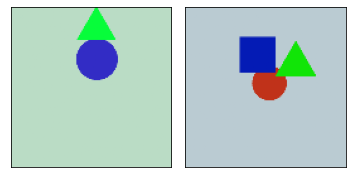

Final


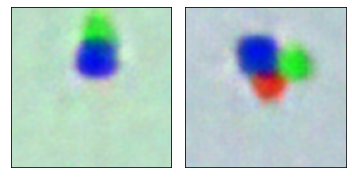

Parts


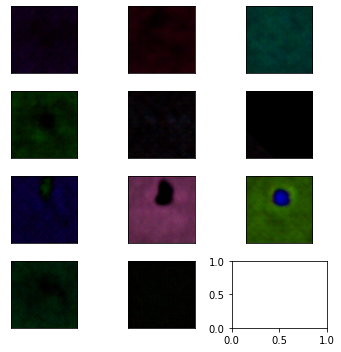

Decode Parts


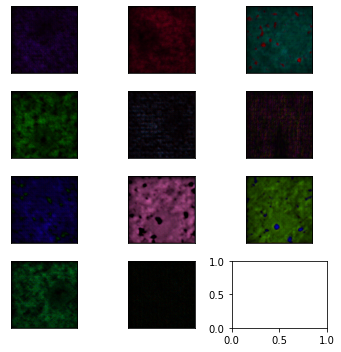

In [10]:
from utils import plot_image
import numpy as np

final_imgs = recontructed_data[0]
input = recontructed_data[1]
transformed_imgs = recontructed_data[2]
decoded_imgs = recontructed_data[3]

final_imgs = np.clip(final_imgs, 0, 1)
transformed_imgs = np.clip(transformed_imgs, 0, 1)
decoded_imgs = np.clip(decoded_imgs, 0, 1)


print(final_imgs.shape)
print(input.shape)
print(transformed_imgs.shape)
print(decoded_imgs.shape)


print('Input')
plot_image(input, None, None, 2, 'unsupervised')

print('Final')
plot_image(final_imgs, None, None, 2, 'unsupervised')

print('Parts')
part = transformed_imgs[0]
plot_image(part, None, None, 12, 'unsupervised')

print('Decode Parts')
decoded_imgs = tf.reshape(decoded_imgs, (-1, 11, 128, 128, 3))
part1 = decoded_imgs[0]
plot_image(part1, None, None, 12, 'unsupervised')


In [11]:
# from utils import plot_filters_stimuli

# model = model_test.model

# encoder = list(filter(lambda layer: layer.name == 'Encoder', model.layers))[-1]

# # for layer in encoder.layers:
# #   print(layer.name)

# base_conv_layer = list(
#     filter(lambda layer: layer.name == 'base_conv', encoder.layers))[-1]
# plot_filters_stimuli(encoder, base_conv_layer, is_conv=True, iters=50, lr=0.1)


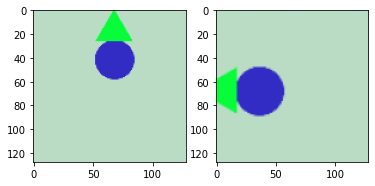

In [12]:
import matplotlib.pyplot as plt
from utils import transform_affine

theta = tf.constant([[[0., 0.8, 0.], [0.8, 0., 0.]]])
theta = tf.repeat(theta, data.shape[0], axis=0)

data1 = transform_affine(data, theta, (data.shape[1], data.shape[2]))

_, ax = plt.subplots(1, 2) 

ax[0].imshow(data[0])
ax[1].imshow(data1[0])


In [14]:
%load_ext tensorboard
%tensorboard --logdir logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5444), started 0:00:10 ago. (Use '!kill 5444' to kill it.)